In [1]:
!pip install webdriver_manager

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
def get_chrome_driver():
    # 1. 브라우저 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()),
        options = chrome_options
    )
    return driver

In [4]:
driver = get_chrome_driver()

In [5]:
NAVER_NEWS_URL = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&&page=1"

셀레니움을 사용해 html 크롤링 하는 방법
- find_element(s)를 통해 가져오기
- page_source를 활용하여 BeautifulSoup과 연동해서 사용하기

In [6]:
driver.get(NAVER_NEWS_URL)

`page_source` + `BeautifulSoup` 활용하기

In [7]:
page = driver.page_source

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=1106" name="viewport"/>
<meta content="IT/과학 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=105" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="모바일, 인터넷, SNS, 통신 등 IT/과학 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="IT/과학 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitte
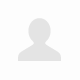
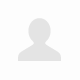

In [8]:
from bs4 import BeautifulSoup as BS
soup = BS(page, 'html.parser')
soup

In [9]:
news = soup.select("#section_body li")
len(news)

20

`find_elements(s)` 활용하기

In [10]:
from selenium.webdriver.common.by import By # 어떤 방식으로 가지고 올건지에 대해

In [11]:
articles = driver.find_elements(
    By.CSS_SELECTOR,
    "#section_body li"
)
len(articles)

20

In [12]:
articles[0].text

'네이버, 검색 넘어 로봇 기술 판다\n네이버(035420)가 7년여 전 투자를 시작한 로봇·자율주행 분야에서 두각을 나 …\n이데일리19분전'

제목만 가져오기

In [13]:
articles[0].find_element(
    By.CSS_SELECTOR,
    "a"
).text
# 안나오는 이유 : 또 다른 a가 존재

''

In [14]:
articles[0].find_element(
    By.CSS_SELECTOR,
    "dt:not(.photo) > a"
).text

'네이버, 검색 넘어 로봇 기술 판다'

In [15]:
# 다 가져오기
for article in articles:
    title = article.find_element(
        By.CSS_SELECTOR,
        "dt:not(.photo) > a"
    ).text
    print(title)

네이버, 검색 넘어 로봇 기술 판다
시들해진 메타버스 열풍...디즈니,MS, 메타마저 사업 철수·축소
과기정통부 재산 1위는 이종호 장관...100억 이상 자산가 2명
美 규제 강화에도 비트코인 강세…금리인상 중단 기대 커져
화성의 여명과 황혼…‘원시의 아름다움’을 드러내다
갤럭시Z폴드5·플립5 성능 실험 유출.. "S23보다 좋네" [1일IT템]
바이낸스, 캐나다 철수 가능성…비트코인은 상승세[코인 브리핑]
[디아블로4] 흥행 간절한 블리자드…“모회사 부진, 중국 판로 말썽”
LG그룹, SAP ERP로 전환…차세대 ERP 통한 혁신 나선다
[NES2023] 챗GPT로 촉발된 AI, 보안업계도 AI 삼매경
한상혁 방통위원장 구속영장 기각…"혐의에 대해 다툼 여지有"
소액생계비대출에 '구름떼'…저소득자 DSR 큰 폭 상승 탓
인텔 "5세대 제온 스케일러블 CPU 올 4분기 출시"
[4세대 인텔 제온] ③ 나승주 총괄 “기술진화와 고객수요 간극…답 찾았다” [소부장반차장]
지옥에서 온 애견인 '존 윅 4', 말은 더 줄이고 총은 더 쏜다
"메일로 해고 통보한 메타 '끔찍'…저커버그 지도력 형편없어"
챗GPT 시대의 노동은 수행이라기보다 지시다
"아이폰15 프로, 배터리 방전되도 버튼 작동"
[CEO맞수]토종 OTT 1위 싸움…티빙 양지을 VS 웨이브 이태현
'디지털 화폐' 효용 모색 한창…미국은 미온적, 왜?


In [16]:
article_list = []

def get_article(page):
    driver = get_chrome_driver()
    
    url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
    driver.get(url)
    articles = driver.find_elements( By.CSS_SELECTOR, "#section_body li")

    for article in articles:
        title = article.find_element( By.CSS_SELECTOR, "dt:not(.photo) > a").text
        article_list.append(title)
    
    print("Crawling : {}".format(page))
    
    driver.quit()

In [17]:
# 모듈화 시킨다음 필요할 때 사용하는 편이 좋다
get_article(1)
article_list

Crawling : 1


['네이버, 검색 넘어 로봇 기술 판다',
 '시들해진 메타버스 열풍...디즈니,MS, 메타마저 사업 철수·축소',
 '과기정통부 재산 1위는 이종호 장관...100억 이상 자산가 2명',
 '美 규제 강화에도 비트코인 강세…금리인상 중단 기대 커져',
 '화성의 여명과 황혼…‘원시의 아름다움’을 드러내다',
 '갤럭시Z폴드5·플립5 성능 실험 유출.. "S23보다 좋네" [1일IT템]',
 '바이낸스, 캐나다 철수 가능성…비트코인은 상승세[코인 브리핑]',
 '[디아블로4] 흥행 간절한 블리자드…“모회사 부진, 중국 판로 말썽”',
 'LG그룹, SAP ERP로 전환…차세대 ERP 통한 혁신 나선다',
 '[NES2023] 챗GPT로 촉발된 AI, 보안업계도 AI 삼매경',
 '한상혁 방통위원장 구속영장 기각…"혐의에 대해 다툼 여지有"',
 "소액생계비대출에 '구름떼'…저소득자 DSR 큰 폭 상승 탓",
 '인텔 "5세대 제온 스케일러블 CPU 올 4분기 출시"',
 '[4세대 인텔 제온] ③ 나승주 총괄 “기술진화와 고객수요 간극…답 찾았다” [소부장반차장]',
 "지옥에서 온 애견인 '존 윅 4', 말은 더 줄이고 총은 더 쏜다",
 '"메일로 해고 통보한 메타 \'끔찍\'…저커버그 지도력 형편없어"',
 '챗GPT 시대의 노동은 수행이라기보다 지시다',
 '"아이폰15 프로, 배터리 방전되도 버튼 작동"',
 '[CEO맞수]토종 OTT 1위 싸움…티빙 양지을 VS 웨이브 이태현',
 "'디지털 화폐' 효용 모색 한창…미국은 미온적, 왜?"]

In [18]:
%%time
article_list = []

for page in range(1, 6):
    get_article(page)
    
print(article_list)
# 직렬 실행을 한다. idle 타임이 생김

Crawling : 1
Crawling : 2
Crawling : 3
Crawling : 4
Crawling : 5
['네이버, 검색 넘어 로봇 기술 판다', '시들해진 메타버스 열풍...디즈니,MS, 메타마저 사업 철수·축소', '과기정통부 재산 1위는...100억 이상 자산가 3명', '美 규제 강화에도 비트코인 강세…금리인상 중단 기대 커져', '화성의 여명과 황혼…‘원시의 아름다움’을 드러내다', '갤럭시Z폴드5·플립5 성능 실험 유출.. "S23보다 좋네" [1일IT템]', '바이낸스, 캐나다 철수 가능성…비트코인은 상승세[코인 브리핑]', '[디아블로4] 흥행 간절한 블리자드…“모회사 부진, 중국 판로 말썽”', 'LG그룹, SAP ERP로 전환…차세대 ERP 통한 혁신 나선다', '[NES2023] 챗GPT로 촉발된 AI, 보안업계도 AI 삼매경', '한상혁 방통위원장 구속영장 기각…"혐의에 대해 다툼 여지有"', "소액생계비대출에 '구름떼'…저소득자 DSR 큰 폭 상승 탓", '인텔 "5세대 제온 스케일러블 CPU 올 4분기 출시"', '[4세대 인텔 제온] ③ 나승주 총괄 “기술진화와 고객수요 간극…답 찾았다” [소부장반차장]', "지옥에서 온 애견인 '존 윅 4', 말은 더 줄이고 총은 더 쏜다", '"메일로 해고 통보한 메타 \'끔찍\'…저커버그 지도력 형편없어"', '챗GPT 시대의 노동은 수행이라기보다 지시다', '"아이폰15 프로, 배터리 방전되도 버튼 작동"', '[CEO맞수]토종 OTT 1위 싸움…티빙 양지을 VS 웨이브 이태현', "'디지털 화폐' 효용 모색 한창…미국은 미온적, 왜?", "[출근길 인터뷰] 자소서도 쓴다는 인공지능 '챗봇' 열풍…인간의 설 자리는?", '별이 블랙홀로…우주에서 가장 눈부신 마지막 순간 [우주다방]', '우버가 오히려 더 싸다고? 리프트의 사생결단 [정혜진의 Whynot 실리콘밸리]', '로봇, 네 다리로 눈 감고도 계단 오르내린다', '“반도체 경기 바닥쳤다”… 마이크론·인텔, 이유있는 급등 [美

Thread를 이용해서 크롤링하기
- 작업 대기 시간을 최대한 줄이기 위해 사용
- 하나의 작업을 순서대로 하는 것이 아닌, 동시에 여러 작업을 하기 위함

In [21]:
%%time
# 스레드로 병렬적으로 가능하다.
import threading

article_list = []

for page in range(1, 6):
    th = threading.Thread(target = get_article, args=(page,))
    th.start()

CPU times: total: 0 ns
Wall time: 1 ms
Crawling : 3
Crawling : 2
Crawling : 1
Crawling : 5
Crawling : 4
